In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame,Series,datetime
%matplotlib inline

## 原始数据->时间序列数据

In [3]:
values = [datetime(2001,1,1),
         datetime(2001,2,1),
         datetime(2001,3,1)]
s = Series(np.arange(3), index=values)
s

2001-01-01    0
2001-02-01    1
2001-03-01    2
dtype: int64

In [4]:
df = pd.DataFrame({'商品A':[25,27,30],
                  '商品B':[10,15,17]},index=values)
df

,商品A,商品B
2001-01-01,25,10
2001-02-01,27,15
2001-03-01,30,17


In [5]:
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01'], dtype='datetime64[ns]', freq=None)

In [6]:
df['商品A']

2001-01-01    25
2001-02-01    27
2001-03-01    30
Name: 商品A, dtype: int64

In [7]:
pd.date_range('2001-01-01',freq='M',periods=3)

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31'], dtype='datetime64[ns]', freq='M')

In [8]:
s = Series(np.arange(3))
s

0    0
1    1
2    2
dtype: int64

In [9]:
s.index = pd.date_range('2001-01-01',freq='M',periods=3)
s

2001-01-31    0
2001-02-28    1
2001-03-31    2
Freq: M, dtype: int64

freq属性种类：
A 年末
M 月末
W 周
D 日
H 时
T 分
S 秒
其他：25种类

In [10]:
s.index = pd.date_range('2001-01-01',freq='MS',periods=3) #MS月初
s

2001-01-01    0
2001-02-01    1
2001-03-01    2
Freq: MS, dtype: int64

In [11]:
s.index = pd.date_range('2001-01-01',freq='W',periods=3) #W周
s

2001-01-07    0
2001-01-14    1
2001-01-21    2
Freq: W-SUN, dtype: int64

In [12]:
s.index = pd.date_range('2001-01-01',freq='W-TUE',periods=3) #显示每周四的日期
s

2001-01-02    0
2001-01-09    1
2001-01-16    2
Freq: W-TUE, dtype: int64

## 字符串与时间序列转换

In [13]:
pd.to_datetime(['2016-09-22','2016-09-23'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.to_datetime(['September 22nd,2016','September 23nd,2016'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [15]:
pd.to_datetime(['22 Sep 2016','23 Sep 2016'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime(['2016年9月22日','2016年9月23日'],format='%Y年%m月%d日')
#对于非默认时间格式需要用format属性标记

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

## 日期切片、选择

In [17]:
idx = pd.date_range('2016-01-01',freq='D',periods=366)
df = DataFrame({
    '商品A': np.random.randint(100,size=366),
    '商品B': np.random.randint(100,size=366)
},index=idx)
df[:5]

,商品A,商品B
2016-01-01,15,63
2016-01-02,66,63
2016-01-03,56,44
2016-01-04,31,90
2016-01-05,97,62


In [18]:
df.loc[datetime(2016,1,2)]

商品A    66
商品B    63
Name: 2016-01-02 00:00:00, dtype: int64

In [19]:
df.loc['2016-01-03']

商品A    56
商品B    44
Name: 2016-01-03 00:00:00, dtype: int64

In [20]:
df.loc['2016-09-22':]

,商品A,商品B
2016-09-22,65,81
2016-09-23,23,8
2016-09-24,26,85
2016-09-25,86,21
2016-09-26,80,85
2016-09-27,77,69
2016-09-28,31,90
2016-09-29,65,61
2016-09-30,53,5
2016-10-01,57,18


In [21]:
df.loc['2016-09-01':'2016-09-30':2]
#9月1日到9月30日每隔1天的数据

,商品A,商品B
2016-09-01,60,86
2016-09-03,65,12
2016-09-05,70,12
2016-09-07,46,21
2016-09-09,79,67
2016-09-11,69,85
2016-09-13,68,0
2016-09-15,14,50
2016-09-17,41,80
2016-09-19,93,63


In [22]:
df.loc['2016-03'] #3月份的数据

,商品A,商品B
2016-03-01,55,58
2016-03-02,38,58
2016-03-03,93,43
2016-03-04,85,52
2016-03-05,69,24
2016-03-06,48,7
2016-03-07,98,62
2016-03-08,17,93
2016-03-09,55,4
2016-03-10,15,8


In [23]:
df['2016-03':'2016-05']#3月到5月的数据

,商品A,商品B
2016-03-01,55,58
2016-03-02,38,58
2016-03-03,93,43
2016-03-04,85,52
2016-03-05,69,24
2016-03-06,48,7
2016-03-07,98,62
2016-03-08,17,93
2016-03-09,55,4
2016-03-10,15,8


In [24]:
df.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [25]:
(df.index.month == 1) | (df.index.month == 3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [26]:
df.loc[(df.index.month == 1) | (df.index.month == 3)]#使用布尔变量来选择对应日期数据

,商品A,商品B
2016-01-01,15,63
2016-01-02,66,63
2016-01-03,56,44
2016-01-04,31,90
2016-01-05,97,62
2016-01-06,57,68
2016-01-07,90,84
2016-01-08,83,87
2016-01-09,46,36
2016-01-10,61,40


### 时间序列数据的属性：
1. year 年
2. month 月
3. day 日
4. hour 时
5. minute 分
6. second 秒
7. microsecond 毫秒
8. nanosecond 纳秒

## 时间序列数据的处理
1. 时间周期的转换
2. 缺损值的补充
3. 前后值的比较与计算

In [27]:
idx = pd.date_range('2016-09-22',freq='H',periods=50)
df = DataFrame({
    'val': np.random.randn(50)
},index=idx)
df = df.cumsum()
df

,val
2016-09-22 00:00:00,-1.217280
2016-09-22 01:00:00,-1.216024
2016-09-22 02:00:00,-2.234297
2016-09-22 03:00:00,-3.653746
2016-09-22 04:00:00,-3.358932
2016-09-22 05:00:00,-3.155605
2016-09-22 06:00:00,-4.908030
2016-09-22 07:00:00,-4.579786
2016-09-22 08:00:00,-3.583683
2016-09-22 09:00:00,-3.647667


In [28]:
df.resample('6H').mean() #以6小时为单位成组

,val
2016-09-22 00:00:00,-2.472647
2016-09-22 06:00:00,-4.337537
2016-09-22 12:00:00,-2.826092
2016-09-22 18:00:00,-2.138425
2016-09-23 00:00:00,-0.847830
2016-09-23 06:00:00,-1.920605
2016-09-23 12:00:00,2.082082
2016-09-23 18:00:00,2.975948
2016-09-24 00:00:00,3.463922


In [29]:
df.resample('30T').interpolate() #以三十分钟为单位成组

,val
2016-09-22 00:00:00,-1.217280
2016-09-22 00:30:00,-1.216652
2016-09-22 01:00:00,-1.216024
2016-09-22 01:30:00,-1.725161
2016-09-22 02:00:00,-2.234297
2016-09-22 02:30:00,-2.944022
2016-09-22 03:00:00,-3.653746
2016-09-22 03:30:00,-3.506339
2016-09-22 04:00:00,-3.358932
2016-09-22 04:30:00,-3.257268


### 组合对象的计算方式种类：
1. ill
2. backfill
3. pad
4. fillna
5. interpolate
6. count
7. nunique
8. first
9. last
10. max
11. median
12. min
13. ohlc
14. prod
15. size
16. sem
17. std
18. sum
19. var

In [30]:
indexer = np.random.randint(4,size=50) == 1
df.loc[indexer] = np.nan
df

,val
2016-09-22 00:00:00,-1.217280
2016-09-22 01:00:00,-1.216024
2016-09-22 02:00:00,NaN
2016-09-22 03:00:00,NaN
2016-09-22 04:00:00,-3.358932
2016-09-22 05:00:00,-3.155605
2016-09-22 06:00:00,-4.908030
2016-09-22 07:00:00,NaN
2016-09-22 08:00:00,-3.583683
2016-09-22 09:00:00,NaN


In [31]:
df.rolling(3).mean()

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,NaN
2016-09-22 02:00:00,NaN
2016-09-22 03:00:00,NaN
2016-09-22 04:00:00,NaN
2016-09-22 05:00:00,NaN
2016-09-22 06:00:00,-3.807522
2016-09-22 07:00:00,NaN
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [32]:
df.shift(periods=1)#将数据前移一个时间序列单位

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,-1.217280
2016-09-22 02:00:00,-1.216024
2016-09-22 03:00:00,NaN
2016-09-22 04:00:00,NaN
2016-09-22 05:00:00,-3.358932
2016-09-22 06:00:00,-3.155605
2016-09-22 07:00:00,-4.908030
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,-3.583683


In [33]:
df - df.shift() #计算前后时间单位差值

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,0.001256
2016-09-22 02:00:00,NaN
2016-09-22 03:00:00,NaN
2016-09-22 04:00:00,NaN
2016-09-22 05:00:00,0.203327
2016-09-22 06:00:00,-1.752425
2016-09-22 07:00:00,NaN
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [34]:
df.diff(periods=1) #计算前后时间单位差值

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,0.001256
2016-09-22 02:00:00,NaN
2016-09-22 03:00:00,NaN
2016-09-22 04:00:00,NaN
2016-09-22 05:00:00,0.203327
2016-09-22 06:00:00,-1.752425
2016-09-22 07:00:00,NaN
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [35]:
idx = pd.date_range('2016-09-22 10:00',freq='T',periods=50)
df = DataFrame({
    'val':np.repeat([0,1,0,1],[10,20,10,10])
},index=idx)
df

,val
2016-09-22 10:00:00,0
2016-09-22 10:01:00,0
2016-09-22 10:02:00,0
2016-09-22 10:03:00,0
2016-09-22 10:04:00,0
2016-09-22 10:05:00,0
2016-09-22 10:06:00,0
2016-09-22 10:07:00,0
2016-09-22 10:08:00,0
2016-09-22 10:09:00,0


In [36]:
df.index[df['val'] != df['val'].shift()]

DatetimeIndex(['2016-09-22 10:00:00', '2016-09-22 10:10:00',
               '2016-09-22 10:30:00', '2016-09-22 10:40:00'],
              dtype='datetime64[ns]', freq=None)

In [37]:
idx = pd.date_range('2016-09-01',freq='D',periods=60)
df = DataFrame({
    '数量':np.random.randint(1000),
    '商品名':np.random.choice(list('ABC'),1000),
    '发货日':np.random.choice(idx,1000)
})
df

,发货日,商品名,数量
0,2016-10-11,C,259
1,2016-09-20,A,259
2,2016-10-17,A,259
3,2016-10-16,B,259
4,2016-10-22,A,259
5,2016-09-10,C,259
6,2016-10-24,C,259
7,2016-10-30,C,259
8,2016-10-07,A,259
9,2016-10-12,A,259


### pd.Grouper 组合数据

In [38]:
df.groupby([pd.Grouper(key='发货日',freq='M'),'商品名']).sum()

数量
发货日        商品名       
2016-09-30 A    38850
           B    43771
           C    42476
2016-10-31 A    42735
           B    46620
           C    44548

## 返回周几 dt.weekday

In [39]:
df['发货日'].dt.weekday

0      1
1      1
2      0
3      6
4      5
5      5
6      0
7      6
8      4
9      2
10     2
11     5
12     1
13     6
14     2
15     6
16     5
17     6
18     5
19     0
20     1
21     2
22     5
23     0
24     3
25     0
26     6
27     5
28     6
29     1
      ..
970    3
971    0
972    6
973    0
974    0
975    3
976    2
977    4
978    0
979    3
980    0
981    1
982    6
983    4
984    1
985    3
986    6
987    3
988    4
989    2
990    0
991    3
992    5
993    5
994    0
995    5
996    6
997    0
998    2
999    5
Name: 发货日, dtype: int64

In [40]:
df.groupby(df['发货日'].dt.weekday).sum()

,数量
发货日,
0,37814
1,31339
2,32893
3,39627
4,37814
5,38591
6,40922


In [41]:
pd.pivot_table(df,index=pd.Grouper(key='发货日',freq='M'),columns='商品名',values='数量',aggfunc='sum')

商品名,A,B,C
发货日,,,
2016-09-30,38850,43771,42476
2016-10-31,42735,46620,44548


## 节假日因素

In [42]:
#待补充

## 时间序列周期自动调整

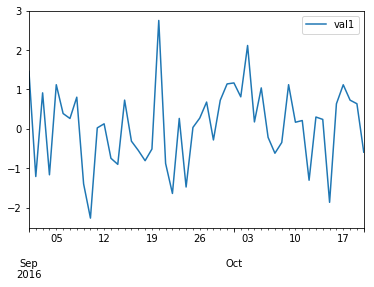

In [43]:
idx1 = pd.date_range('2016-09-01',freq='D',periods=50)
df1 = DataFrame({
    'val1':np.random.randn(50)
},index=idx1)
df1.plot()

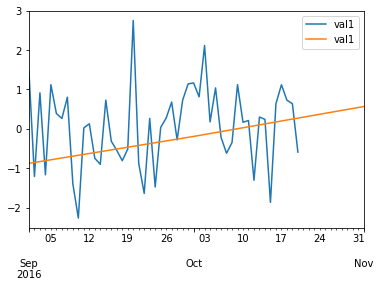

In [44]:
idx2 = pd.date_range('2016-09-01',freq='M',periods=3)
df2 = DataFrame({
    'val1':np.random.randn(3)
},index=idx2)
ax = df1.plot()
df2.plot(ax=ax)

## 时间序列的统计模型

目的：
1. 时间关系调查
2. 预测数据
3. 异动点，变化点的检索

时间序列的注意点
1. 是否存在某个时间点之前的数据影响
2. 是否有季节性规律（淡季、旺季）


## AirPassengers实例

1. 每月搭乘航班人数
2. 单变量、季节性因素分析

In [95]:
df = pd.read_csv('AirPassengers.csv',index_col=0)#载入数据

df[:5]

## 文件中时间为浮点数，要将其转换为年与月
1. 小数点前为年份，通过地板除提取到temp1
2. 小数点后为月份，一年看做1，故1月就为1/12，通过小数数值为1/12的多少个倍数来提取月份到temp2
3. 转换为字符串进行连接

In [98]:
temp1 = df.time.astype(int)
temp2 = (df.time % 1 / (1.0/12.0) + 1)

In [75]:
temp1[:5]

1    1949
2    1949
3    1949
4    1949
5    1949
Name: time, dtype: int64

浮点数除法有点误差需要round四舍五入

In [114]:
df.time = [str(x) + '-' + str(int(round(y))) for x,y in zip(temp1,temp2)]

In [122]:
df.time = pd.to_datetime(df.time)
df.index = df.time
df = df.drop('time',axis = 1)

In [123]:
df[:5]

,AirPassengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 可视化分析

In [124]:
res = sm.tsa.seasonal_decompose(df)

/home/laptop/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


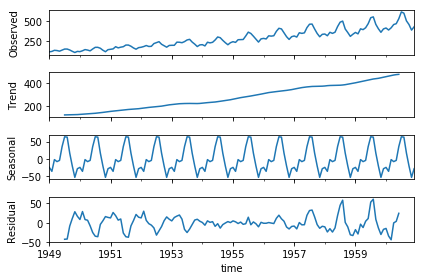

In [127]:
fig = res.plot()

图1：原始数据
图2：趋势
图3：季节性
图4：方差